Code was based off of:
 https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/tree/master/chapter3-autoencoders
which was written in Keras then I converted to Pytorch

In [ ]:
import random
#random.seed(42)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dataset_loader
import torchvision

import cv2
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

import os

In [ ]:
def rgb2gray(rgb):
    """Convert from color image (RGB) to grayscale.
       Source: opencv.org
       grayscale = 0.299*red + 0.587*green + 0.114*blue
    Argument:
        rgb (tensor): rgb image
    Return:
        (tensor): grayscale image
    """
    #B = [0.299, 0.587, 0.114,]
    #trial = []
    """
    for this to work in pytorch, you need to fix the order of the dimensions using np.transpose
    """
    swag =  np.dot(rgb[..., :3], [0.299, 0.587, 0.114,])
    #tensor = torch.from_numpy(swag) #torch.Size([224, 224])
    #tensor = swag.unsqueeze(dim=0) # torch.Size([1, 224, 224])
    #tensor = tensor.numpy()
    return swag

In [ ]:
cifar_dataset = dataset_loader.CIFAR10(root='./data', download=True, train=True)
# cifar_dataset.shape, type(cifar_dataset)
cifar_testData = dataset_loader.CIFAR10(root='./data', download=True, train=False)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
cifar_train = cifar_dataset.data

In [ ]:
cifar_test = cifar_testData.data

In [ ]:
img_rows =32
img_cols = 32
channels = 3

(10, 10, 32, 32, 3)
(320, 320, 3)


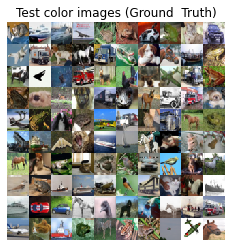

In [ ]:
imgs_dir = 'saved_images'
save_dir = os.path.join(os.getcwd(), imgs_dir)
if not os.path.isdir(save_dir):
        os.makedirs(save_dir)

# display the 1st 100 input images (color and gray)

'''def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    #plt.show()
    plt.figure()
    plt.axis('off')
    plt.title('Test color images (Ground  Truth)')
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation=None)
    plt.savefig('%s/test_color.png' % imgs_dir)
    plt.show()
'''

# get some random training images
#dataiter = iter(trainloader)
#train_images, train_labels = dataiter.next()

#dataiter = iter(testloader)
#test_images, test_labels = dataiter.next()
print_images = cifar_test[:100]
# show images
#imshow(torchvision.utils.make_grid(train_images))
# print labels
#print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#testing = np.transpose(test_images, (0, 2, 3, 1)); 
#imgs = (testing / 2+0.5)
imgs = print_images.reshape((10, 10, img_rows, img_cols, channels))
print(imgs.shape)
imgs = np.vstack([np.hstack(i) for i in imgs])
print(imgs.shape)
plt.figure()
plt.axis('off')
plt.title('Test color images (Ground  Truth)')
plt.imshow(imgs, interpolation='none')
plt.savefig('%s/test_color.png' % imgs_dir)
plt.show()

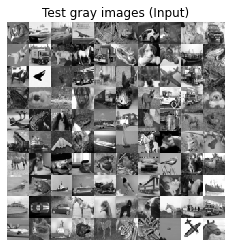

In [ ]:
print_test_images_gray = rgb2gray(print_images)
imgs = print_test_images_gray
imgs = imgs.reshape((10, 10, img_rows, img_cols))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Test gray images (Input)')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.savefig('%s/test_gray.png' % imgs_dir)
plt.show()

In [ ]:
# convert color train and test images to gray
x_train_gray = rgb2gray(cifar_train)
x_test_gray = rgb2gray(cifar_test)

In [ ]:
#print(np.mean(x_train))
x_train = cifar_train.astype('float32') / 255
x_test = cifar_test.astype('float32') / 255
#print(np.mean(x_train))
# normalize input train and test grayscale images
x_train_gray = x_train_gray.astype('float32') / 255
x_test_gray = x_test_gray.astype('float32') / 255

In [ ]:
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)

In [ ]:
x_train_gray = torch.from_numpy(x_train_gray)
x_test_gray = torch.from_numpy(x_test_gray)

In [ ]:
x_train_gray.unsqueeze_(-1);
x_test_gray.unsqueeze_(-1);


In [ ]:
# reshape images to row x col x channel for CNN output/validation
x_train = x_train.reshape(x_train.shape[0], channels, img_cols, img_rows)
x_test = x_test.reshape(x_test.shape[0], channels, img_cols, img_rows)

# reshape images to row x col x channel for CNN input
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], 1, img_cols, img_rows)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], 1, img_cols, img_rows)

In [ ]:
trainloader = torch.utils.data.DataLoader(x_train, batch_size=32,
                                         shuffle=False, num_workers=0, drop_last=True)
testloader = torch.utils.data.DataLoader(x_test, batch_size=32,
                                         shuffle=False, num_workers=0, drop_last=True)

In [ ]:
class ConvNet(nn.Module):

    def __init__(self):
        super(ConvNet, self).__init__()
    

        self.fc1 = nn.Conv2d(1, 64, kernel_size, stride = 2, padding=1)
        #self.bn1 = nn.BatchNorm2d(64)
        self.fc2 = nn.Conv2d(64, 128, kernel_size, stride = 2, padding=1)
        #self.bn2 = nn.BatchNorm2d(128)
        self.fc3 = nn.Conv2d(128, 256, kernel_size, stride = 2, padding=1)
        #self.bn3 = nn.BatchNorm2d(256)
        self.dense = nn.Linear(4*4*256, 256)
        #self.dropout = nn.Dropout(p=0.2)
        


        self.start = nn.Linear(256, 4*4*256)
        self.de1 = nn.ConvTranspose2d(256, 256, kernel_size, stride = 2, padding=1, output_padding=1)
        #self.de_bn1 = nn.BatchNorm2d(256)
        self.de2 = nn.ConvTranspose2d(256, 128, kernel_size, stride = 2, padding=1, output_padding=1)
        #self.de_bn2 = nn.BatchNorm2d(128)
        self.de3 = nn.ConvTranspose2d(128, 64, kernel_size, stride = 2, padding=1, output_padding=1)
        #self.de_bn3 = nn.BatchNorm2d(64)
        self.output = nn.ConvTranspose2d(64, 3, kernel_size, stride=1, padding=1)

    
    def forward(self, x):
        # Encoder Phase
        p1 = F.relu((self.fc1(x)))
        #print(p1.shape)
        p2 = F.relu((self.fc2(p1)))
        #print(p2.shape)
        p3 = F.relu((self.fc3(p2)))
        #print(p3.shape)
        p4 = p3.flatten(start_dim=1)
        #print(p4.shape)
        p5 = self.dense(p4)
        #print(p5.shape)
        # Decoder Phase
        d1 = self.start(p5)
        #print(d1.shape)
        d2 = d1.reshape(32, 256, 4, 4)
        #print(d1.shape)
        d3 = F.relu((self.de1(d2)))
        d4 = F.relu((self.de2(d3)))
        d5 = F.relu((self.de3(d4)))
        d6 = torch.sigmoid(self.output(d5))
        return d6

In [ ]:
kernel_size = 3

In [ ]:
learning_rate = 0.001
epochs = 50
criterion = torch.nn.MSELoss()

net = ConvNet()
net.cuda()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
from torch.optim.lr_scheduler import LambdaLR, StepLR, MultiStepLR, ExponentialLR, ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               optimizer = optimizer,
                               cooldown=0,
                               patience=5,
                               verbose=True,
                               min_lr=0.5e-6)


'''learning_rate = 0.001 w/out init
EPOCH: 1 | Train_loss: 5.298060707747936 | Test_loss: 4.664965499192476 '''

'''learning_rate = 0.001 w init
EPOCH: 19 | Train_loss: 2.419214886147529 | Test_loss: 2.8218238903209567
Finished Training '''
# 0.005 bad

"""lr = 0.002
EPOCH: 19 | Train_loss: 2.539735778234899 | Test_loss: 2.9037803756073117
Finished Training"""
'''
lr = 0.001 no batchnorm loss is good but the image is quite dark
'''
'''
lr =0.001 with reduce on plateau 
at epoch: lr_reducer.step(loss)\
looks pretty good, 2.5 loss
"""
'''
#above + BN looks decent, not really sure
#lrschdule +BN + uniform looks decent lr = 0.001
#lr =0.0015 doesn't make much diff
#lr =0.001, and removed BN

'\nlr =0.001 with reduce on plateau \nat epoch: lr_reducer.step(loss)looks pretty good, 2.5 loss\n"""\n'

In [ ]:
def weight_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear) or isinstance(m, nn.ConvTranspose2d):
        nn.init.xavier_uniform_(m.weight, gain=nn.init.calculate_gain('relu'))
        nn.init.zeros_(m.bias)

net.apply(weight_init)

#xavier_uniform_ = 2.8

#torch.nn.init.xavier_normal_ = 2.7

#torch.nn.init.kaiming_uniform_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu') = 

ConvNet(
  (fc1): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (fc2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (fc3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (dense): Linear(in_features=4096, out_features=256, bias=True)
  (start): Linear(in_features=256, out_features=4096, bias=True)
  (de1): ConvTranspose2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (de2): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (de3): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (output): ConvTranspose2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu"); device

device(type='cuda')

In [ ]:
train_loss_container, test_loss_container = [], []

for e in range(epochs):  # loop over the dataset multiple times
    predicted = []
    train_loss = 0.0
    test_loss = 0.0
    if e > 0:
      lr_reducer.step(loss)
    for train_data in trainloader:
        
        #train_data = np.asarray(train_data)
        optimizer.zero_grad()

        x_train_gray = train_data.reshape(train_data.shape[0], img_cols, img_rows, 3)
        x_train_gray = x_train_gray * 255
        x_train_gray = rgb2gray(x_train_gray)
        x_train_gray = x_train_gray / 255
        x_train_gray = torch.from_numpy(x_train_gray)
        x_train_gray.unsqueeze_(-1);
        x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], 1, img_cols, img_rows)
        x_train_gray = x_train_gray.float()
        x_train_gray = x_train_gray.to(device)
        train_data = train_data.to(device)


        model_op = net(x_train_gray)
        loss = criterion(model_op, train_data)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        
        

    with torch.no_grad():
        for test_data in testloader:
            # get the inputs
            #test_data = np.asarray(test_data)
            x_test_gray = test_data.reshape(test_data.shape[0], img_cols, img_rows, 3)
            x_test_gray = x_test_gray * 255
            x_test_gray = rgb2gray(x_test_gray)
            x_test_gray = x_test_gray / 255
            x_test_gray = torch.from_numpy(x_test_gray)
            x_test_gray.unsqueeze_(-1);
            x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], 1, img_cols, img_rows)
            x_test_gray = x_test_gray.float()
            x_test_gray = x_test_gray.to(device)
            test_data = test_data.to(device)
            # forward + backward + optimize
            model_op = net(x_test_gray)
            predicted.append(model_op)
            loss_test = criterion(model_op, test_data)
            test_loss += loss_test.item()
    
    train_loss_container.append(train_loss)
    test_loss_container.append(test_loss)
    print('\nEPOCH: {} | Test_loss: {}'.format(e, test_loss), end='')
print('\nFinished Training')


EPOCH: 0 | Test_loss: 3.3812876734882593
EPOCH: 1 | Test_loss: 2.8927889172919095
EPOCH: 2 | Test_loss: 2.677148495800793
EPOCH: 3 | Test_loss: 2.577037516515702
EPOCH: 4 | Test_loss: 2.5116730672307312
EPOCH: 5 | Test_loss: 2.4227489344775677
EPOCH: 6 | Test_loss: 2.470936182420701
EPOCH: 7 | Test_loss: 2.4024969008751214
EPOCH: 8 | Test_loss: 2.396122799720615
EPOCH: 9 | Test_loss: 2.404764478560537
EPOCH: 10 | Test_loss: 2.3956719553098083
EPOCH: 11 | Test_loss: 2.4396702707745135
EPOCH: 12 | Test_loss: 2.457709212321788
EPOCH: 13 | Test_loss: 2.5075886701233685
EPOCH: 14 | Test_loss: 2.4811946456320584
EPOCH: 15 | Test_loss: 2.46544427331537
EPOCH: 16 | Test_loss: 2.4846486221067607
EPOCH: 17 | Test_loss: 2.4874607250094414
EPOCH: 18 | Test_loss: 2.461752712726593
EPOCH: 19 | Test_loss: 2.4611926008947194
EPOCH: 20 | Test_loss: 2.4847046486102045
EPOCH: 21 | Test_loss: 2.539839321747422
EPOCH: 22 | Test_loss: 2.465861561242491
EPOCH: 23 | Test_loss: 2.4791702022776008
EPOCH: 24 | 

/content/saved_images
torch.Size([128, 3, 32, 32])


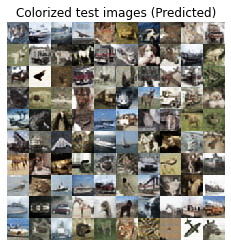

In [ ]:
#x_decoded = autoencoder.predict(x_test_gray)
imgs_dir = 'saved_images'
save_dir = os.path.join(os.getcwd(), imgs_dir)
print(save_dir)
if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
dataiter = iter(testloader)
for i in range(4):
  test = dataiter.next()
  test = test.reshape(test.shape[0], img_cols, img_rows, 3)
  test = test * 255
  test = rgb2gray(test)
  test = test / 255
  test = torch.from_numpy(test)
  test.unsqueeze_(-1);
  test = test.reshape(test.shape[0], 1, img_cols, img_rows)
  test = test.float()
  test = test.to(device)
  #test_data = test_data.to(device)
  if i == 0:
    swag = net(test)
  if i == 1:
    swag1 = net(test)
  if i == 2:
    swag2 = net(test)
  if i == 3:
    swag3 = net(test)
#x_decoded = torch.cat(swag, swag1, swag2, swag3[:4])
x_decoded = torch.cat([swag, swag1, swag2, swag3], dim=0)
print(x_decoded.shape)
# display the 1st 100 colorized images
imgs = x_decoded[:100].cpu()
imgs = imgs.reshape((10, 10, img_rows, img_cols, channels)).detach()
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Colorized test images (Predicted)')
plt.imshow(imgs, interpolation='none')
plt.savefig('%s/colorized.png' % imgs_dir)
plt.show()